## An Estimated model of the US Farm Size Distribution

The following presents a relatively parsimonious three-factor general equilibrium model of the farm size distribution for the US agricultural economy which is then calibrated/estimated using the method of moments.  We model production using a nested three-factor CES production technology that employs land, capital and labor and that is augmented by non-traded farming skill/managerial talent.

The analysis is broadly similar in focus to the recent Adamopoulus and Restuccia's (2014) article [The Size Distribution of Farms and International Productivity Differences](https://www.aeaweb.org/articles.php?doi=10.1257/aer.104.6.1667) but with a few improvements: (1) we incorporate labor into the analysis (theirs assumes jus capital and land); (2) we estimate all key parameters in the model to match key variables, and (3) we employ a more parsimonious model to avoid several questionable assumptions.

We use a three-input CES production function capable of generating some key stylized facts about the US farm economy (we demonstrate these facts empirically using USDA data in a section below). Adamopolous/Restuccia also lay them out as important but their modeling is a bit different. These facts for the US economy include:

1. the capital-land and labor-land ratios tend to fall as farm size goes up

2. the capital/labor ratio remains more or less constant at most farm sizes.

We take it that unobserved differences in farming skill or managerial ability determine productivity differences across farms to determine differences in factor inputs and therefore in farm size.  This is similar to Lucas' (1978) span-of-control model except that to be consistent with the stylized facts we will work with a non-homothetic production function, one where the unobserved 'skill' or poductivity parameter is thought of as something that enhances land-use management primarily.In the right parameter region this will make it land-augmenting and capital and labor saving, consistent with the stylized facts.

Accordingly, consider the nested CES production function.

$y=\left[\left(a_ll^\rho+a_kk^\rho\right)^\frac{\phi}{\rho}+st^\phi\right]^\frac{\gamma}{\phi}$

Every would-be farmer has this production function and non-traded skill level $s$.  Faced with labor, capital and land factor prices $(w,r,q)$ land and labor demands will be given by:

$t=\gamma^\frac{1}{1-\gamma}\left[Z^{\frac{\phi}{1-\phi}\frac{1-\rho}{\rho}}+s\left(\frac{s}{q}\right)^\frac{\phi}{1-\phi}\right]^\frac{\gamma-\phi}{\phi(1-\gamma)}\left(\frac{s}{q}\right)^\frac{1}{1-\phi}$


$l=\gamma^\frac{1}{1-\gamma}\left[Z^{\frac{\phi}{1-\phi}\frac{1-\rho}{\rho}}+s\left(\frac{s}{q}\right)^\frac{\phi}{1-\phi}\right]^\frac{\gamma-\phi}{\phi(1-\gamma)}Z^\frac{\phi-\rho}{\rho(1-\phi)}\left(\frac{a_l}{w}\right)^\frac{1}{1-\rho}$

where $Z=a_l\left(\frac{a_l}{w}\right)^\frac{\rho}{1-\rho}+a_k\left(\frac{a_k}{r}\right)^\frac{\rho}{1-\rho}$

The equilibrium labor/land ratio is:

$\frac{l}{t}=\frac{\left[s\left(\frac{s}{q}\right)^\frac{\rho}{1-\rho}+a_l\left(\frac{a_l}{w}\right)^\frac{\rho}{1-\rho}\right]^\frac{\phi-\rho}{\rho(1-\phi)}\left(\frac{a_l}{w}\right)^\frac{1}{1-\rho}}{\left(\frac{s}{q}\right)^\frac{1}{1-\phi}} $

This ratio will go down if $\phi$ is smaller than $\rho$. The capital-land ratio is given by:

$\frac{k}{t}=\frac{\left[a_k\left(\frac{a_k}{r}\right)^\frac{\rho}{1-\rho}+a_l\left(\frac{a_l}{w}\right)^\frac{\rho}{1-\rho}\right]^\frac{\phi-\rho}{\rho(1-\phi)}\left(\frac{k}{r}\right)^\frac{1}{1-\rho}}{\left(\frac{s}{t}\right)^\frac{1}{1-\phi}} $

Finally, the labor/capital ratio is simply:

$\frac{l}{k}=\left(\frac{a_l}{a_k}\frac{r}{w}\right)^\frac{1}{1-\rho}$

Let's lay down a few parameter values (note that the ordering of $\rho, \phi$, and $\gamma$ matters) to demonstrate this framework is capable of generating the stylized facts.

In [1]:
%matplotlib inline             
import matplotlib.pyplot as plt

import numpy as np
import scipy.optimize as so        # scientific functions needed later
from math import exp
from scipy.stats import norm, lognorm
from scipy.integrate import quad
from scipy.optimize import newton

Production function and factor demand parameters for initial illustration.

In [40]:
rho=.3
phi=.5
gam=.7
w=1
r=1
q=1
al=1
ak=1.1

A function to compute the capital land ratio as a function of skill level $s$:

In [3]:
def ktrat(s):
    part1=(ak/r)**(1/(1-rho))
    part2=(s/q)**(1/(1-phi))
    part3=(ak*(ak/r)**(1/(1-rho))+al*(al/w)**(1/(1-rho)))**((phi-rho)/(rho*(1-phi)))
    rat=part3*part1/part2
    return rat

Now, a function to compute the land labor ratio:

In [4]:
def ltrat(s):
    part1=(al/w)**(1/(1-rho))
    part2=(s/q)**(1/(1-phi))
    part3=(ak*(ak/r)**(1/(1-rho))+al*(al/w)**(1/(1-rho)))**((phi-rho)/(rho*(1-phi)))
    rat=part3*part1/part2
    return rat

Finally, a function to compute the labor capital ratio (which really doesn't have to be a function, but we leave it like this to allow for future flexibility:

Here and below we shall assume there are $N$ would be farmers or points in the farm skill distribution.

In [5]:
N = 100

In [6]:
def lkrat(s):
    part1=(al/w)**(1/(1-rho))
    part2=(ak/w)**(1/(1-rho))
    return (part2/part1)*np.ones(N)

Let's just plot these functions and see how they vary with the level of skill (again, this is just variation in $s_1$, everything else fixed).

In [7]:
si=np.linspace(.51,3,N)               # plotting ratios as functions of skill
                                      # to see if we get the right relationship.

In [8]:
KTrat=ktrat(si)             #MATT: no need to loop as already vectorized - JONATHAN: awesome so that's how this is done!
LTrat=ltrat(si)
LKrat=lkrat(si)

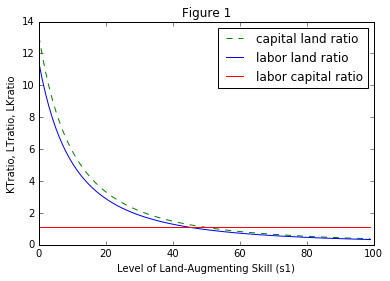

In [37]:
plt.plot(KTrat,'--g',label='capital land ratio')
plt.plot(LTrat,'-b',label='labor land ratio')
plt.plot(LKrat,'-r',label='labor capital ratio')
plt.xlabel('Level of Land-Augmenting Skill (s1)')
plt.ylabel('KTratio, LTratio, LKratio')
plt.title('Figure 1')
plt.legend()
plt.show()

It bears mentioning that this graph captures in a rough way basic empirical facts about agriculture - that labor and capital intensity go down as the size of parcel - which is proportionate to skill - increases. We can also describe how input demands work as functions of skill, which might be even more suggestive:

In [10]:
def xDemands(s):
    Z=al*(al/w)**(rho/(1-rho))+ak*(ak/r)**(rho/(1-rho))
    CommonComponent=(Z**((phi/(1-phi))*((1-rho)/rho))+s*(s/q)**(phi/(1-phi)))
    CommonComponentPower=CommonComponent**((gam-phi)/(phi*(1-gam)))
    ld=gam**(1/(1-gam))*CommonComponentPower*Z**((phi-rho)/(rho*(1-phi)))*(al/w)**(1/(1-rho))
    kd=gam**(1/(1-gam))*CommonComponentPower*Z**((phi-rho)/(rho*(1-phi)))*(ak/r)**(1/(1-rho))
    td=gam**(1/(1-gam))*CommonComponentPower*(s/q)**(1/(1-phi))
    return (ld,kd,td)

In [11]:
LD,KD,TD=xDemands(si)

Armed with these demands, we can now plot them and see the role of capital augmenting skill.

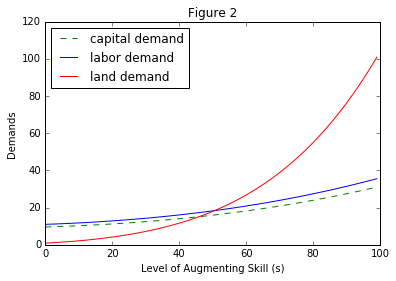

In [38]:
plt.plot(LD,'--g',label='capital demand')
plt.plot(KD,'-b',label='labor demand')
plt.plot(TD,'-r',label='land demand')
plt.xlabel('Level of Augmenting Skill (s)')
plt.ylabel('Demands')
plt.title('Figure 2')
plt.legend(loc='upper left')
plt.show()

That seems to be about the way it should look - as farmer skill rises, the farmer demands more of everything, but the demand for land rises faster for land, as opposed to capital and labor. So capital and labor intensity is higher for smaller farms. 

Finally, let's look at output per unit input

In [41]:
def prodn(s,T,K,L):
    return (( (al*L**rho+ak*K**rho)**phi/rho  + s*T**phi) )**(gam/phi)

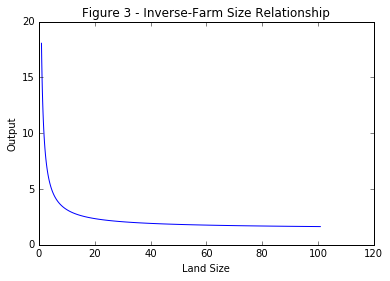

In [42]:
YO=prodn(si,TD,KD,LD)
plt.plot(TD,YO/TD,label='output per unit land')
plt.xlabel('Land Size')
plt.ylabel('Output')
plt.title('Figure 3 - Inverse-Farm Size Relationship')
plt.show()

Table 6 of the 2013 USDA's publication ["Farm Size and the Organization of U. S. Crop Farming"](http://www.ers.usda.gov/media/1156726/err152.pdf) gives information on the size distribution (in 6 quantiles), for three types of farms - Corn, Soybean, and Wheat farms. Labor and capital input usage is broken into six size classes are Less than 100, 100-249, 250-499,500-999, 1000-1999, and 2000+.

Actual land used is broken into more classes, so we will also input that data. First, the land usage data. The first row is the fraction of firms at each size octile. The second row is the fraction of agricultural land held by those firms. The sizes are Less than 10, 10 to 49, 49-99, 100-249, 250-499,500-999, 1000-1999, and 2000+. Note that the cut points for binning are a little different for labor and capital, where we have 0-100, 100-250, 250-500, 500-999, 1000-1999, and 2000+. So we will also add a term for this:


In [15]:
LandOctiles=np.array([[11.2,32.5,16.0,15.1,13.4,6.1,3.9,1.7],
                      [0.2,3.5,4.7,8.8,17.8,18.2,22.7,24.1]])    #Not really octiles - just eight size groups
LandSizeCuts=np.array([10,50,100,250,500,1000,2000])
LandSizeCutsLK=np.array([100,250,500,1000,2000])

The bar plot below essentially reproduces the USDA's figure describing this data as follows:

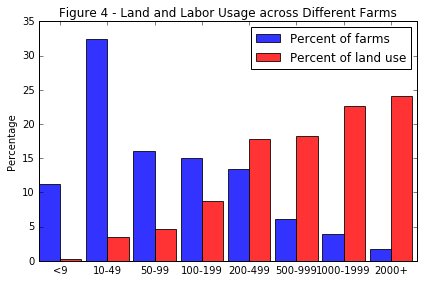

In [43]:
fig, ax = plt.subplots()

index = np.arange(8)
bar_width = 0.45

opacity = 0.8
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, LandOctiles[0,:], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Percent of farms')

rects2 = plt.bar(index + bar_width, LandOctiles[1,:], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Percent of land use')
ax.set_xticks(index+bar_width)
ax.set_xticklabels( ('<9', '10-49', '50-99', '100-199', '200-499','500-999','1000-1999','2000+') )

plt.ylabel('Percentage')
plt.title("Figure 4 - Land and Labor Usage across Different Farms")

plt.tight_layout()
plt.legend()
plt.show()

Here is the labor - to be precise, mean hour per harvested acre, where the first row is corn, the second is soybeans, and the third wheat:


In [17]:
LaborSextiles=np.array([[38.6,12.3,7.8,5.7,3.5,2.7],
                        [45.7,10.4,7.3,5.8,3.8,3.0],
                        [40.4,8.7,5.8,5.3,3.2,2.2]],dtype=float)

Next, here is capital:, which is in terms of dollars per harvested acre for each of three crops:

In [18]:
CapitalSextiles=np.array([[2532,847,683,568,505,432],
                          [2880,826,640,535,387,332],
                          [3325,588,396,320,278,242]])

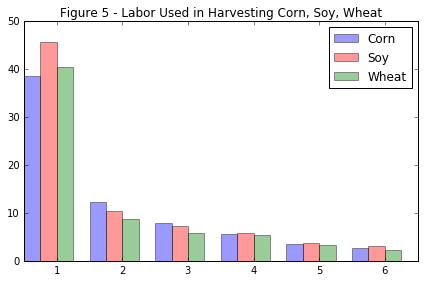

In [44]:
fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, LaborSextiles[0,:], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Corn')

rects2 = plt.bar(index + bar_width, LaborSextiles[1,:], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Soy')

rects3 = plt.bar(index + bar_width*2, LaborSextiles[2,:], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Wheat')

plt.title('Figure 5 - Labor Used in Harvesting Corn, Soy, Wheat')
ax.set_xticks(index+2*bar_width)
ax.set_xticklabels(('1','2','3','4','5','6'))

plt.tight_layout()
plt.legend()
plt.show()

The above shows how the skill distribution fades as we move along. Note the close similarity across each crop. Next, let's try capital:

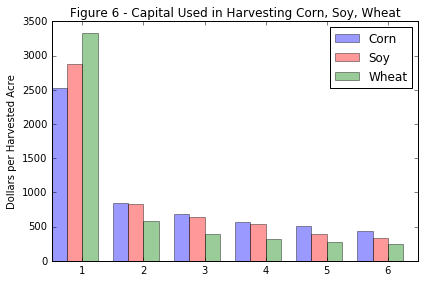

In [45]:
fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.25

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, CapitalSextiles[0,:], bar_width,
                 alpha=opacity,
                 color='b',
                 label='Corn')

rects2 = plt.bar(index + bar_width, CapitalSextiles[1,:], bar_width,
                 alpha=opacity,
                 color='r',
                 label='Soy')

rects3 = plt.bar(index + bar_width*2, CapitalSextiles[2,:], bar_width,
                 alpha=opacity,
                 color='g',
                 label='Wheat')

ax.set_xticks(index+2*bar_width)
ax.set_xticklabels(('1','2','3','4','5','6'))

plt.ylabel('Dollars per Harvested Acre')
plt.title('Figure 6 - Capital Used in Harvesting Corn, Soy, Wheat')

plt.tight_layout()
plt.legend()
plt.show()

Now, a simple empirical exercise we might engage in is to try to get our skill distribution (which means find the parameters of the skill distribution which we shall assume to be lognormal) to generate equilibrium demands that match the sextiles of the capital-land, labor-land, and labor-capital ratios. 

In so doing, we first have to decide what things we would like to take as given. Moreover, we have to think about how to translate expenditures on things into actual units (Adamopoulos/Restuccia seem to like to leave these things as free variables in the optimization).

Along these lines, we need a function that takes in a mean and a variance, creates a skill distribution, bins the resulting factor demands, and then sees how closely the empirical distribution matches the actual one. 

Before doing this, let's just get a farm rental rate. I'm setting this at 25\$, I googled and found a rate of \$249 a day for some piece of equipment, so dividing this by 10 working hours in a day gives 25\$. Our targets will be:

In [21]:
LaborTarget=np.mean(LaborSextiles,axis=0)
CapitalTarget=np.mean(CapitalSextiles,axis=0)
R=25.00
CapitalTarget=CapitalTarget/R

In [22]:
print(CapitalTarget)
print(LaborTarget)

[ 116.49333333   30.14666667   22.92         18.97333333   15.6
   13.41333333]
[ 41.56666667  10.46666667   6.96666667   5.6          3.5          2.63333333]


Now, let's see if we can calibrate some parameters to match this data, along with the size distribution data on land itself. We will do this to get the basic parameters of the production function along with the skill distribution. So, we will drop those we are trying to match. We will also define stand-alone demand functions, and integrals of these functions:

In [23]:
del al,ak,phi,rho,gam                                     # Drop parameters so we can solve for them instead

In [24]:
def LaborDemand(s,al,ak,phi,rho,gam):
    Z=al*(al/w)**(rho/(1-rho))+ak*(ak/r)**(rho/(1-rho))
    CommonComponent=(Z**((phi/(1-phi))*((1-rho)/rho))+s*(s/q)**(phi/(1-phi)))
    CommonComponentPower=CommonComponent**((gam-phi)/(phi*(1-gam)))
    ld=gam**(1/(1-gam))*CommonComponentPower*Z**((phi-rho)/(rho*(1-phi)))*(al/w)**(1/(1-rho))
    return ld

def CapitalDemand(s,al,ak,phi,rho,gam):
    Z=al*(al/w)**(rho/(1-rho))+ak*(ak/r)**(rho/(1-rho))
    CommonComponent=(Z**((phi/(1-phi))*((1-rho)/rho))+s*(s/q)**(phi/(1-phi)))
    CommonComponentPower=CommonComponent**((gam-phi)/(phi*(1-gam)))
    kd=gam**(1/(1-gam))*CommonComponentPower*Z**((phi-rho)/(rho*(1-phi)))*(ak/r)**(1/(1-rho))
    return kd

def LandDemand(s,al,ak,phi,rho,gam):
    Z=al*(al/w)**(rho/(1-rho))+ak*(ak/r)**(rho/(1-rho))
    CommonComponent=(Z**((phi/(1-phi))*((1-rho)/rho))+s*(s/q)**(phi/(1-phi)))
    CommonComponentPower=CommonComponent**((gam-phi)/(phi*(1-gam)))
    td=gam**(1/(1-gam))*CommonComponentPower*(s/q)**(1/(1-phi))
    return td

def LaborLandRat(s,al,ak,phi,rho,gam):
    part1=(al/w)**(1/(1-rho))
    part2=(s/q)**(1/(1-phi))
    part3=(ak*(ak/r)**(1/(1-rho))+al*(al/w)**(1/(1-rho)))**((phi-rho)/(rho*(1-phi)))
    rat=part3*part1/part2
    return rat

def CapitalLandRat(s,al,ak,phi,rho,gam):
    part1=(ak/r)**(1/(1-rho))
    part2=(s/q)**(1/(1-phi))
    part3=(ak*(ak/r)**(1/(1-rho))+al*(al/w)**(1/(1-rho)))**((phi-rho)/(rho*(1-phi)))
    rat=part3*part1/part2
    return rat

In [25]:
def intLabor(s,mu,sigma,al,ak,phi,rho,gam):
    val1=LaborLandRat(s,al,ak,phi,rho,gam)
    val2=lognorm.pdf(s,sigma,mu)
    return val1*val2

def intCapital(s,mu,sigma,al,ak,phi,rho,gam):
    val1=CapitalLandRat(s,al,ak,phi,rho,gam)
    val2=lognorm.pdf(s,sigma,mu)
    return val1*val2

def intLand(s,mu,sigma,al,ak,phi,rho,gam):
    val1=LandDemand(s,al,ak,phi,rho,gam)
    val2=lognorm.pdf(s,sigma,mu)
    return val1*val2

Just a check to make sure that we can integrate the labor fuunction for some reasonable values:

In [26]:
M=.1
S=1.0
AL=1.0
AK=1.0
PHI=.7
RHO=.5
GAM=.8
I1 = quad(intLabor, 0, np.inf, args=(M,S,AL,AK,PHI,RHO,GAM))
I2 = quad(intCapital, 0, np.inf, args=(M,S,AL,AK,PHI,RHO,GAM))
del M,S,AL,AK,PHI,RHO,GAM                                        #Just so they aren't laying around - keep that workspace neat!
print(I1)
print(I2)

(32.000462709838644, 1.612677757422219e-07)
(32.000462709838644, 1.612677757422219e-07)


Next we define an objective function that matches values.  We are going to try to completely use the distributional information we have on labor, capital, and land demand. Recall that the labor and capital demand is in sextile form, while the land demand is in quantile form. Let's set up the sextiles and octtiles:

One last bit of theory in pursuit of the idea of developing things in as closed-form as possible. We shall also want to look at the density of farms between the cut points, (0,10),(10,50), etc. Can we form the density directly from the land demand function? Recall that land demand is:

$t=\gamma^\frac{1}{1-\gamma}\left[Z^{\frac{\phi}{1-\phi}\frac{1-\rho}{\rho}}+s\left(\frac{s}{q}\right)^\frac{\phi}{1-\phi}\right]^\frac{\gamma-\phi}{\phi(1-\gamma)}\left(\frac{s}{q}\right)^\frac{1}{1-\phi}$

What we want is to find the value of $s$ that corresponds with the given threshold or cut point values of $t=10,50,100,500,1000,2000$. Then, we can integrate demand functions between cut points $s(t_1),s(t_2),...s(t_N)$ and then go on from there. To do so, we will have to be able to find a value of $s$ given a value of $t$. Note we could be more scientific about this given the closed-form (i.e., program in the derivative of the function), but for now this does the job.

In [27]:
def findsGivent(s,t,al,ak,phi,rho,gam):
    return t-LandDemand(s,al,ak,phi,rho,gam)

AL=.1
AK=.1
PHI=.5
RHO=.7
GAM=.8
T=1
sCuts=np.zeros((7,1))
newton(findsGivent,1,fprime=None,args=(T,AL,AK,PHI,RHO,GAM))
for i in range(0,7):
    sCuts[i]=newton(findsGivent,LandSizeCuts[i],fprime=None,args=(LandSizeCuts[i]/10,AL,AK,PHI,RHO,GAM),tol=1e-10,maxiter=1000)
del AL,AK,PHI,RHO,GAM,T
print(sCuts)
del sCuts

[[ 1.13325532]
 [ 1.39244988]
 [ 1.52080596]
 [ 1.70818487]
 [ 1.86469125]
 [ 2.03520425]
 [ 2.22100482]]


For given parameters our objective tells us how well we match the data, specifically we try to match labor and capital demands for farms of each of the different land size bins as well as get the 

In [28]:
def objective(X,disp=True):
    mu, sigma = X[0], X[1]
    al, ak =exp(X[2]),exp(X[3])
    gam=exp(X[6])/(1+exp(X[6]))
    phi=exp(X[4])/(1+exp(X[4])) 
    rho=exp(X[5])/(1+exp(X[5]))
    sCuts=np.zeros((7,1))
    for i in range(0,7):
        sCuts[i]=newton(findsGivent,LandSizeCuts[i],fprime=None,args=(LandSizeCuts[i]/10,al,ak,phi,rho,gam),tol=1e-8,maxiter=10000)
    sCutsLK=np.zeros((5,1))
    for i in range(0,5):
        sCutsLK[i]=newton(findsGivent,LandSizeCutsLK[i],fprime=None,args=(LandSizeCuts[i]/10,al,ak,phi,rho,gam),tol=1e-8,maxiter=10000)
    interSmeansL=np.zeros((6,1),dtype=float)
    interSmeansK=np.zeros((6,1),dtype=float)
    interOmeansT=np.zeros((8,1),dtype=float)
    densityOT=np.zeros((8,1),dtype=float)
    densityOLK=np.zeros((6,1),dtype=float)
    for i in range(0,8):                                               #First compute the lower and upper values of 6 given sextiles
        if i==0:
            interOmeansT[i]=quad(intLand,0,sCuts[i],args=(mu,sigma,al,ak,phi,rho,gam))[0]
            densityOT[i]=lognorm.cdf(sCuts[i],sigma,mu)
            interOmeansT[i]=interOmeansT[i]/densityOT[i]
        elif i==7:
            interOmeansT[i]=quad(intLand,sCuts[i-1],np.Inf,args=(mu,sigma,al,ak,phi,rho,gam))[0]
            densityOT[i]=1-lognorm.cdf(sCuts[i-1],sigma,mu)
            interOmeansT[i]=interOmeansT[i]/densityOT[i]
        else:
            interOmeansT[i]=quad(intLand,sCuts[i-1],sCuts[i],args=(mu,sigma,al,ak,phi,rho,gam))[0]              # We don't really need this...
            densityOT[i]=lognorm.cdf(sCuts[i],sigma,mu)-lognorm.cdf(sCuts[i-1],sigma,mu)
            interOmeansT[i]=interOmeansT[i]/densityOT[i]
    for i in range(0,6):
        if i==0:
            interSmeansL[i]=quad(intLabor,0,sCutsLK[i],args=(mu,sigma,al,ak,phi,rho,gam))[0]
            interSmeansK[i]=quad(intCapital,0,sCutsLK[i],args=(mu,sigma,al,ak,phi,rho,gam))[0]
            densityOLK[i]=lognorm.cdf(sCutsLK[i],sigma,mu)
            interSmeansL[i]=interSmeansL[i]/densityOLK[i]
            interSmeansK[i]=interSmeansK[i]/densityOLK[i]
        elif i==5:
            interSmeansL[i]=quad(intLabor,sCutsLK[i-1],np.Inf,args=(mu,sigma,al,ak,phi,rho,gam))[0]
            interSmeansK[i]=quad(intCapital,sCutsLK[i-1],np.Inf,args=(mu,sigma,al,ak,phi,rho,gam))[0]
            densityOLK[i]=1-lognorm.cdf(sCutsLK[i-1],sigma,mu)
            interSmeansL[i]=interSmeansL[i]/densityOLK[i]
            interSmeansK[i]=interSmeansK[i]/densityOLK[i]
        else:
            interSmeansL[i]=quad(intLabor,sCutsLK[i-1],sCutsLK[i],args=(mu,sigma,al,ak,phi,rho,gam))[0]
            interSmeansK[i]=quad(intCapital,sCutsLK[i-1],sCutsLK[i],args=(mu,sigma,al,ak,phi,rho,gam))[0]
            densityOLK[i]=lognorm.cdf(sCutsLK[i],sigma,mu)-lognorm.cdf(sCutsLK[i-1],sigma,mu)
            interSmeansL[i]=interSmeansL[i]/densityOLK[i]
            interSmeansK[i]=interSmeansK[i]/densityOLK[i]
    vals=np.vstack((np.vstack((densityOT,interSmeansL)),interSmeansK))
    targs=np.vstack((np.vstack((np.reshape(LandOctiles[0,:]/100,(8,1)),np.reshape(LaborTarget,(6,1)))),np.reshape(CapitalTarget,(6,1))))
    errors=vals-targs
    objVal=np.dot(np.transpose(errors),errors)
    DrawToPrint=np.random.uniform()
    if DrawToPrint>.99:
        print(objVal,X)
    return objVal

Now that we have an objective function defined, let's see if we can actually minimize it with respect to the parameters. If this works, I'll shit my britches. Anyways, here goes:

In [29]:
xGuess=-.1,.5,3,3,.5,.3,.7
optResult=so.minimize(objective,xGuess,method='Nelder-Mead',tol=1e-3,options={'disp': True, 'maxiter':10000, 'maxfev':5000})

[[ 639.28222226]] [-0.15097569  0.42058364  1.18177808  1.54818469  0.06090206  0.55186346
  0.91851763]
[[ 617.01135763]] [-0.15082631  0.42947772  1.20054767  1.58044064  0.06866125  0.5478846
  0.90103955]
[[ 582.35520478]] [-0.15089736  0.39459281  1.09932194  1.49485043  0.04244388  0.56492721
  0.96238682]
[[ 476.0546763]] [-0.12809002  0.33693705  0.95176584  1.30616994  0.00311839  0.61913186
  1.13594048]
[[ 473.90350196]] [-0.1275632   0.33652083  0.94689181  1.30851486  0.00294975  0.62016829
  1.13763765]
[[ 470.65757659]] [-0.12633423  0.33310922  0.93290643  1.30062729  0.00224338  0.62354762
  1.14579047]
[[ 466.61567393]] [-0.1254172   0.32809692  0.91410365  1.2880495   0.00165493  0.62740277
  1.15486675]
[[ 443.53767271]] [ -1.13783550e-01   3.13716896e-01   8.77327674e-01   1.23333387e+00
   2.54177056e-04   6.48439354e-01   1.20990769e+00]
[[ 436.21100854]] [ -1.10710392e-01   3.08908474e-01   8.62153525e-01   1.21769396e+00
   1.31437644e-04   6.54655208e-01   1.2

C:\Users\yaoqi_000\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:352: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


In [30]:
Results=optResult.x
MU=Results[0]
SIGMA=Results[1]
AL=exp(Results[2])
AK=exp(Results[3])
GAMMA=exp(Results[6])/(1+exp(Results[6]))
PHI=exp(Results[4])/(1+exp(Results[4]))
RHO=exp(Results[5])/(1+exp(Results[5]))
print(MU,SIGMA)
print(AL,AK)
print(GAMMA,PHI,RHO)

-0.106362824694 0.302444251693
2.31956641693452 3.3077253017857564
0.7766972106829395 0.5000118159668486 0.6599948065989669


Now, that we have some results, let's see what happens if we look at what they imply. One could do this scientifically (look at the Chi-Square statistic or something from the moment matching problem). But it is probably best to see how close our binned values come to the actual binned values. 

First, the size distribution of farms:



In [46]:
sCutsResults=np.zeros((7,1))
for i in range(0,7):
    sCutsResults[i]=newton(findsGivent,LandSizeCuts[i],fprime=None,args=(LandSizeCuts[i]/10,AL,AK,PHI,RHO,GAMMA),tol=1e-8,maxiter=10000)
interOmeansTResult=np.zeros((8,1),dtype=float)
densityOTResult=np.zeros((8,1),dtype=float)

# the following is the main alteration
for i in range(0,8):
    if i==0:
        interOmeansTResult[i]=quad(intLand,0,sCutsResults[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        densityOTResult[i]=25000*lognorm.cdf(sCutsResults[i],SIGMA,MU)  # change the weight of densityOTResult
        interOmeansTResult[i]=interOmeansTResult[i]/densityOTResult[i]
        
    elif i==1:
        densityOTResult[i]=0.3*(1-lognorm.cdf(sCutsResults[i-1],SIGMA,MU))   # change the weight of densityOTResult
        interOmeansTResult[i]=quad(intLand,sCutsResults[i-1],sCutsResults[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        interOmeansTResult[i]=interOmeansTResult[i]/densityOTResult[i]
        
    elif i==2:
        densityOTResult[i]=0.15*(1-lognorm.cdf(sCutsResults[i-1],SIGMA,MU))   # change the weight of densityOTResult
        interOmeansTResult[i]=quad(intLand,sCutsResults[i-1],sCutsResults[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        interOmeansTResult[i]=interOmeansTResult[i]/densityOTResult[i]
        
    elif i==3:
        densityOTResult[i]=0.15*(1-lognorm.cdf(sCutsResults[i-1],SIGMA,MU))   # change the weight of densityOTResult
        interOmeansTResult[i]=quad(intLand,sCutsResults[i-1],sCutsResults[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        interOmeansTResult[i]=interOmeansTResult[i]/densityOTResult[i]
    
    elif i==4:
        densityOTResult[i]=0.15*(1-lognorm.cdf(sCutsResults[i-1],SIGMA,MU))   # change the weight of densityOTResult
        interOmeansTResult[i]=quad(intLand,sCutsResults[i-1],sCutsResults[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        interOmeansTResult[i]=interOmeansTResult[i]/densityOTResult[i]
        
    elif i==5:
        densityOTResult[i]=0.13*(1-lognorm.cdf(sCutsResults[i-1],SIGMA,MU))   # change the weight of densityOTResult
        interOmeansTResult[i]=quad(intLand,sCutsResults[i-1],sCutsResults[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        interOmeansTResult[i]=interOmeansTResult[i]/densityOTResult[i]
        
    elif i==6:
        densityOTResult[i]=0.13*(1-lognorm.cdf(sCutsResults[i-1],SIGMA,MU))   # change the weight of densityOTResult
        interOmeansTResult[i]=quad(intLand,sCutsResults[i-1],sCutsResults[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        interOmeansTResult[i]=interOmeansTResult[i]/densityOTResult[i]
        
    elif i==7:
        interOmeansTResult[i]=quad(intLand,sCutsResults[i-1],np.Inf,args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        densityOTResult[i]=0.3*(1-lognorm.cdf(sCutsResults[i-1],SIGMA,MU))   # change the weight of densityOTResult
        interOmeansTResult[i]=interOmeansTResult[i]/densityOTResult[i]

In [47]:
densityOTResult*100

array([[ 10.20993565],
       [ 29.99987748],
       [ 14.94618944],
       [ 14.49765691],
       [ 11.29180367],
       [  5.71358298],
       [  2.29901484],
       [  1.54812038]])

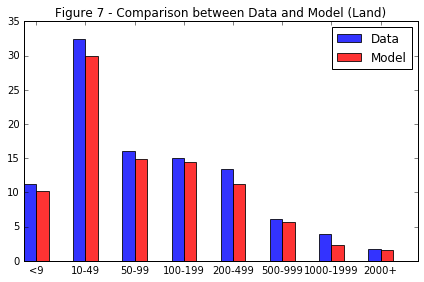

In [49]:
fig, ax = plt.subplots()

index = np.arange(8)
bar_width = 0.25

opacity = 0.8
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, np.array(LandOctiles[0,:]), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Data')

rects2 = plt.bar(index + bar_width, np.array(densityOTResult*100), bar_width,
                 alpha=opacity,
                 color='r',
                 label='Model')
ax.set_xticks(index+bar_width)
ax.set_xticklabels( ('<9', '10-49', '50-99', '100-199', '200-499','500-999','1000-1999','2000+') )

plt.title('Figure 7 - Comparison between Data and Model (Land)')
plt.tight_layout()
plt.legend()
plt.show()

IDE: change color

So, we can see that our model is not perfect in that it misses the data a bit. This suggests we may want to scale things differently in the minimization problem - give more weight, perhaps, to matching the density. What about the group-by-group mean factor demands?

In [34]:
sCutsLKResult=np.zeros((5,1))
for i in range(0,5):
    sCutsLKResult[i]=newton(findsGivent,LandSizeCutsLK[i],fprime=None,args=(LandSizeCuts[i]/10,AL,AK,PHI,RHO,GAMMA),tol=1e-8,maxiter=10000)
interSmeansLResult=np.zeros((6,1),dtype=float)
interSmeansKResult=np.zeros((6,1),dtype=float)
densityOTResult=np.zeros((8,1),dtype=float)
densityOLKResult=np.zeros((6,1),dtype=float)
for i in range(0,6):
    if i==0:
        interSmeansLResult[i]=quad(intLabor,0,sCutsLKResult[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        interSmeansKResult[i]=quad(intCapital,0,sCutsLKResult[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        densityOLKResult[i]=lognorm.cdf(sCutsLKResult[i],SIGMA,MU)
        interSmeansLResult[i]=interSmeansLResult[i]/densityOLKResult[i]
        interSmeansKResult[i]=interSmeansKResult[i]/densityOLKResult[i]
    elif i==5:
        interSmeansLResult[i]=quad(intLabor,sCutsLKResult[i-1],np.Inf,args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        interSmeansKResult[i]=quad(intCapital,sCutsLKResult[i-1],np.Inf,args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        densityOLKResult[i]=1-lognorm.cdf(sCutsLKResult[i-1],SIGMA,MU)
        interSmeansLResult[i]=interSmeansLResult[i]/densityOLKResult[i]
        interSmeansKResult[i]=interSmeansKResult[i]/densityOLKResult[i]
    else:
        interSmeansLResult[i]=quad(intLabor,sCutsLKResult[i-1],sCutsLKResult[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        interSmeansKResult[i]=quad(intCapital,sCutsLKResult[i-1],sCutsLKResult[i],args=(MU,SIGMA,AL,AK,PHI,RHO,GAMMA))[0]
        densityOLKResult[i]=lognorm.cdf(sCutsLKResult[i],SIGMA,MU)-lognorm.cdf(sCutsLKResult[i-1],SIGMA,MU)
        interSmeansLResult[i]=interSmeansLResult[i]/densityOLKResult[i]
        interSmeansKResult[i]=interSmeansKResult[i]/densityOLKResult[i]

Let's graph these by bin and see how close they come to the data. First, labor demand by size grouping:

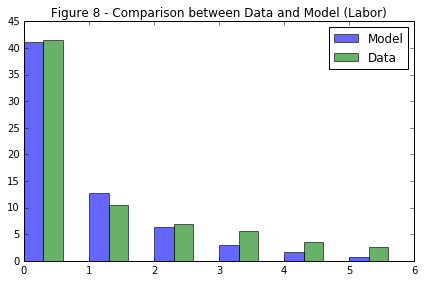

In [50]:
fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.3

opacity = 0.6
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, np.array(np.squeeze(interSmeansLResult)), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Model')

rects3 = plt.bar(index + bar_width, np.array(LaborTarget), bar_width,
                 alpha=opacity,
                 color='g',
                 label='Data')

plt.title('Figure 8 - Comparison between Data and Model (Labor)')
plt.tight_layout()
plt.legend()
plt.show()

The labor fit looks pretty good (even though the bins don't seem to be lining up correctly (why is that?). What about Capital?

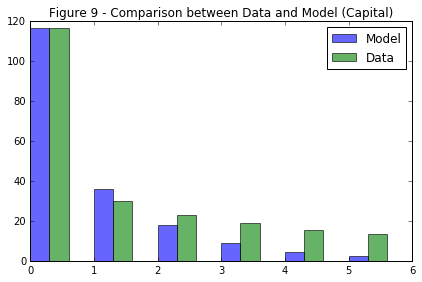

In [51]:
fig, ax = plt.subplots()

index = np.arange(6)
bar_width = 0.3

opacity = 0.6
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, np.array(np.squeeze(interSmeansKResult)), bar_width,
                 alpha=opacity,
                 color='b',
                 label='Model')

rects3 = plt.bar(index + bar_width, np.array(CapitalTarget), bar_width,
                 alpha=opacity,
                 color='g',
                 label='Data')

plt.title('Figure 9 - Comparison between Data and Model (Capital)')

plt.tight_layout()
plt.legend()
plt.show()

Close. While the model very roughly matches the data, the point is really that this sort of thing
can be done. Moreover, the basic idea can be extended to solve for some of the things that we have taken for given, such as wages, capital rates, etc. 

We have worked up an example here where we match binned data from the United States. These results can be extended to other parts of the world in several complementary ways. One idea, following Adamopolous and Restuccia, is to use the skill distribution from the United States data (which we have essentially estimated) as "the frontier" in a model that can then be used to document departures from efficiency elsewhere in the world. 

Another idea would be to fit a model like the above to specific regions or areas of a country with comparison of the distribution of "unobserved factors" across regions. If anomalies were observed, one could then explain them. 

A final idea would be to bring additional information to bear on the problem and build sources of inefficiency directly into the model. Adamopolous and Restuccia do this for different parts of the world. Our gold standard would be including strategic behavior on the part of  "large interests" in the model.